# Convolutional Model with Batch Normalization



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras import backend as K
from imutils import build_montages
import matplotlib.pyplot as plt
import cv2


Using TensorFlow backend.


In [0]:
#width=28, height=28, depth=1, classes=10
model = Sequential()
inputShape = (28, 28, 1)
chanDim = -1
# first CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3), padding="same",
  input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(10))
model.add(Activation("softmax"))

model.summary()

W0619 06:41:22.278541 139707850680192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0619 06:41:22.326915 139707850680192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 06:41:22.335511 139707850680192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0619 06:41:22.374803 139707850680192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0619 06:41:22.375838 1397078506

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
__________

##Downloading Image Input and the remaining procesing

In [0]:
NUM_EPOCHS = 25      # Number of epochs
INIT_LR = 1e-2      # Initial Learning rate
BS = 32    # Batch size
((X_train, y_train), (X_test, y_test)) = fashion_mnist.load_data()
print(X_train.shape)


4423680/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)


### Data Augmentation

In [0]:
y_train = y_train.reshape((y_train.shape[0], 1))
#print(train_labels.shape)
rows = 28
cols = 28

def translation(train_images):
    M = np.float32([[1,0,5],[0,1,10]])
    dst = cv2.warpAffine(train_images,M,(cols,rows))
    dst = dst.reshape((1, dst.shape[0], dst.shape[1]))
    #print(dst.shape)
    return dst


for i in range (500):
    X_train = np.vstack((X_train, translation(X_train[i])))
    y_train = np.append(y_train, y_train[i])

y_train = y_train.reshape((y_train.shape[0], 1))   

def rotation(train_images, angle):
    M = cv2.getRotationMatrix2D((cols/2,rows/2),-75,1)
    rot = cv2.warpAffine(train_images[i],M,(cols,rows))
    return rot

for i in range (500):
    X_train = np.vstack((X_train, translation(X_train[i])))
    y_train = np.append(y_train, y_train[i])

y_train = y_train.reshape((y_train.shape[0], 1)) 
def rotation(train_images, angle):
    M = cv2.getRotationMatrix2D((cols/2,rows/2),180,1)
    rot = cv2.warpAffine(train_images[i],M,(cols,rows))
    return rot

for i in range (500):
    X_train = np.vstack((X_train, translation(X_train[i])))
    y_train = np.append(y_train, y_train[i])

y_train = y_train.reshape((y_train.shape[0], 1)) 

def rotation(train_images, angle):
    M = cv2.getRotationMatrix2D((cols/2,rows/2),75,1)
    rot = cv2.warpAffine(train_images[i],M,(cols,rows))
    return rot

for i in range (500):
    X_train = np.vstack((X_train, translation(X_train[i])))
    y_train = np.append(y_train, y_train[i])

y_train = y_train.reshape((y_train.shape[0], 1)) 






In [0]:
# if we are using "channels first" ordering, then reshape the design
# matrix such that the matrix is:
# 	num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
	X_train = X_train.reshape((X_train.shape[0], 1, 28, 28))
	X_test = X_test.reshape((X_test.shape[0], 1, 28, 28))
else:
	X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
	X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
  
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
# one-hot encode the training and testing labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]
# initialize the optimizer and model
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)

In [0]:
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

W0619 06:41:59.805603 139707850680192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
H = model.fit(X_train, y_train,
	validation_data=(X_test, y_test),
	batch_size=BS, epochs=NUM_EPOCHS)

W0619 06:41:59.922530 139707850680192 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 62000 samples, validate on 10000 samples
Epoch 1/25
62000/62000 [==============================] - 22s 357us/step - loss: 0.5763 - acc: 0.8078 - val_loss: 0.3497 - val_acc: 0.8765
Epoch 2/25
62000/62000 [==============================] - 18s 283us/step - loss: 0.3562 - acc: 0.8731 - val_loss: 0.3465 - val_acc: 0.8676
Epoch 3/25
62000/62000 [==============================] - 18s 284us/step - loss: 0.3029 - acc: 0.8919 - val_loss: 0.2525 - val_acc: 0.9108
Epoch 4/25
62000/62000 [==============================] - 18s 290us/step - loss: 0.2779 - acc: 0.9006 - val_loss: 0.2422 - val_acc: 0.9117
Epoch 5/25
62000/62000 [==============================] - 17s 281us/step - loss: 0.2572 - acc: 0.9065 - val_loss: 0.2291 - val_acc: 0.9179
Epoch 6/25
62000/62000 [==============================] - 17s 281us/step - loss: 0.2459 - acc: 0.9108 - val_loss: 0.2338 - val_acc: 0.9146
Epoch 7/25
62000/62000 [==============================] - 17s 281us/step - loss: 0.2383 - acc: 0.9132 - val_loss: 0.

              precision    recall  f1-score   support

         top       0.90      0.86      0.88      1000
     trouser       1.00      0.98      0.99      1000
    pullover       0.93      0.89      0.91      1000
       dress       0.93      0.94      0.94      1000
        coat       0.88      0.92      0.90      1000
      sandal       0.99      0.98      0.99      1000
       shirt       0.78      0.81      0.80      1000
     sneaker       0.96      0.98      0.97      1000
         bag       0.99      0.99      0.99      1000
  ankle boot       0.98      0.97      0.98      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



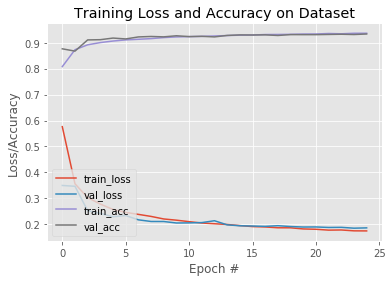

In [0]:
# make predictions on the test set
preds = model.predict(X_test)

# show a nicely formatted classification report
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1),
	target_names=labelNames))

# plot the training loss and accuracy
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"]
         , label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")


##Note the Following results for number of epochs == 25
# Some of the inferences:

Without Augmentation :  Train_Acc : 93.8 Test_Acc : 93.4


With Data Augmentation: Train_Acc : 89.15 Test_Acc :82.60


Without Activation (relu ) : Train_Acc : 91.37 Test_Acc = 91.11



## SUMMARY

It is clearly depicted that introducing augmentation only to the training set introduce lot of variance and made the distribution of the train data a bit different than the test set . And note the accuracy dropped by 4% approx. 
And the model without activations are also tested and got a accuracy reduction of 2% approx. From this we can infere that introduction of further non linearity improves the model performance atleaast in this case.

Dropouts in this model plays a important role in improving the accuracy.
